# Sersic Disk Complex

SersicDiskComplex is a morphology option in PhoSim that allows the simulation of complex spiral structure that is not possible in other current image simulators. SersicDiskComplex has 14 positional parameters for describing the morphology of the object. Here, I will write some functions that simplify the process of writing a PhoSim input file with self-documenting code that provides insight into what each positional parameter does. PhoSim Instance Catalog documentation can be found here with proper units: https://bitbucket.org/phosim/phosim_release/wiki/Instance%20Catalog

We will begin by writing a header to an open file object. The header has information about target RA and DEC, exposure time, filter, and more. I will start by translating the filter codes into a filter wavlength for ease of use.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from astropy.io import fits
from matplotlib.colors import LogNorm

%matplotlib inline
plt.style.use('dark_background')
plt.rcParams["axes.grid"] = False

In [2]:
# Short wavelength first, long wavelength next
# Short wavelength occupies line 1 and 2 of the following dictionary
filters = {'F070W':0, 'F090W':1, 'F200W':2, 'F210M':3, 'F212N':4, 'F115W':5, 'F140M':6,
           'F150M':7, 'F115W2':8, 'F162M':9, 'F164N':10, 'F182N':11, 'F187N':12,
           'F250M':0, 'F277W':1, 'F430M':2, 'F444W':3, 'F460M':4, 'F466N':5, 'F470N':6,
           'F480M':7, 'F300M':8, 'F322W2':9, 'F323N':10, 'F335M':11, 'F356W':12,
           'F360M':13, 'F405N':14, 'F410M':15}

In [3]:
def write_header(file, observation_id, filter_string, target_RA, target_DEC, expT):
    header = f'filter {filters[filter_string]}\nrightascension {target_RA}\ndeclination {target_DEC}\n\
rotskypos 0.0\nrottelpos 0.0\nOpsim_obshistid {observation_id}\nobstime {expT}\n\n'
    file.write(header)

We have a function to write a simple header, and a filter library that allows us to grab the right filter code for PhoSim. Next, we want to start adding objects to our input file in the SersicDiskComplex form. The parameters are exactly the same as the documentation, but I will elaborate further later on what each parameter does, and what appropriate values are for each parameter.

In [4]:
def write_object(file, RA, DEC, mag, sed, axis1, axis2, disk_scale_height, angle1, angle2, angle3, sersic_n,\
                 clump_fraction, clump_number, clump_size, spiral_fraction, winding_angle, bar_size,
                 spiral_width, position_angle):
    prefix = f'object 0 {RA} {DEC} {mag} {sed} 0 0 0 0 0 0 '
    params = f'sersicDiskComplex {axis1} {axis2} {disk_scale_height} {angle1} {angle2} {angle3} \
{sersic_n} {clump_fraction} {clump_number} {clump_size} {spiral_fraction} {winding_angle} {bar_size} \
{spiral_width} {position_angle} none none\n'
    file.write(prefix + params)

This is a true mess of parameters, but completely general. I am not sure how to take limited information from something like JADES and turn it into an appropriate sersicDiskComplex form. This parameterization is what requires further work. However, we can play around with each parameter individually to see what each one changes, and what appropriate values are. First, I need to write some PhoSim input files using the functions I wrote above while varying individual parameters. my output filenames will represent which parameter I am changing. I need a list of default values for any that I am not changing. Let's pick the following:

In [5]:
default_vals = [1.0, 1.0, 0.1, 0.0, 0.0, 0.0, 1.0, 0.2, 1000, 0.4, 0.8, 15.0, 0.0, 0.3, 0.0]
m = 20
sed = '../sky/sed_flat.txt'

# Change output_dir to whatever directory you want your catalog files in
output_dir = 'output/'
file_names = ['axis1.cat', 'axis2.cat', 'disk_height.cat', 'angle1.cat', 'angle2.cat', 'angle3.cat',
              'sersic_n.cat', 'clump_fraction.cat', 'clump_number.cat', 'clump_size.cat', 'spiral_fraction.cat',
              'winding_angle.cat', 'bar_size.cat', 'spiral_width.cat', 'position_angle.cat']

In [8]:
# First, let's get an image of this default object
default = open(output_dir + 'default.cat', 'w')
expT = 600.0

header_params = (default, 'default', 'F277W', 0.0, 0.0, expT)
object_params = (default, 0.0, 0.0, m, sed) + tuple(default_vals)

write_header(*header_params)
write_object(*object_params)

default.close()

## Let's take a look at that image

In [6]:
im_dir = 'images/'
im_name = 'default.fits.gz'

im_data = fits.open(im_dir + im_name)[0].data

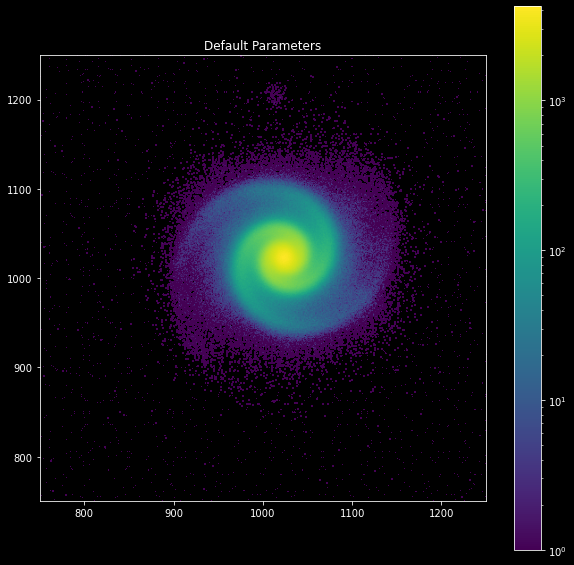

In [7]:
fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Default Parameters')
plt.xlim(750, 1250)
plt.ylim(750, 1250)
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

Immediately, we can see an excellent spiral structure. The actual galaxy has about a 200 pixel radius, so we can create a mosaic in order to alter a single parameter. For example, let's look at axis1.

In [128]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
axis1 = np.linspace(0.25, 1.75, 12)
expT = 600.0

axis1_file = open(output_dir + 'axis1.cat', 'w')

header_params = (axis1_file, 'axis1', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    temp[0] = axis1[i]
    object_params = (axis1_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

axis1_file.close()

## Axis 1 (Arcseconds) Image

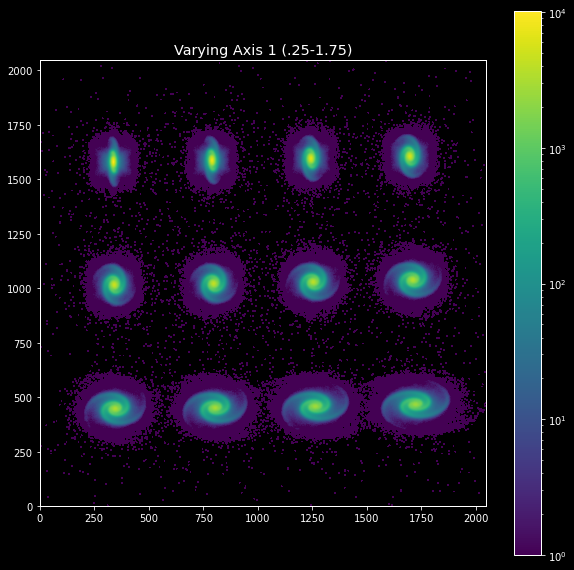

In [129]:
im_name = 'axis1.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Axis 1 (.25-1.75)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Axis 2 (Arcseconds)

In [130]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
axis2 = np.linspace(0.25, 1.75, 12)
expT = 600.0

axis2_file = open(output_dir + 'axis2.cat', 'w')

header_params = (axis2_file, 'axis2', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    temp[1] = axis2[i]
    object_params = (axis2_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

axis2_file.close()

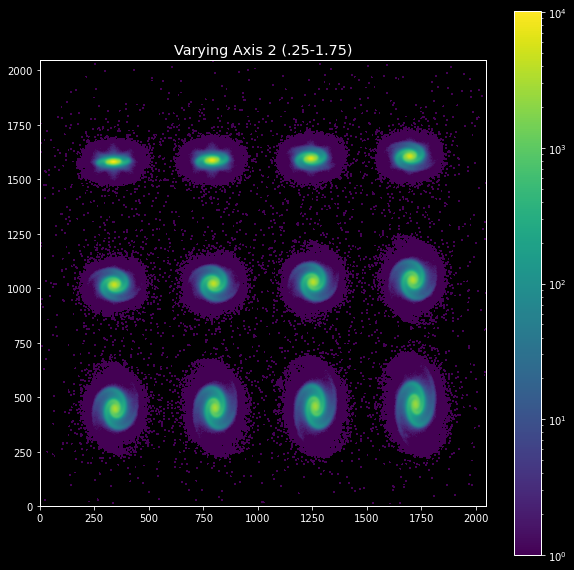

In [131]:
im_name = 'axis2.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Axis 2 (.25-1.75)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Disk Scale Height (Arcseconds)

In [137]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
disk_height = np.linspace(0.05, 0.25, 12)
expT = 600.0

disk_height_file = open(output_dir + 'disk_height.cat', 'w')

header_params = (disk_height_file, 'disk_height', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    temp[2] = disk_height[i]
    # Need to view edge on to see differences
    temp[4] = 90.0
    object_params = (disk_height_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

disk_height_file.close()

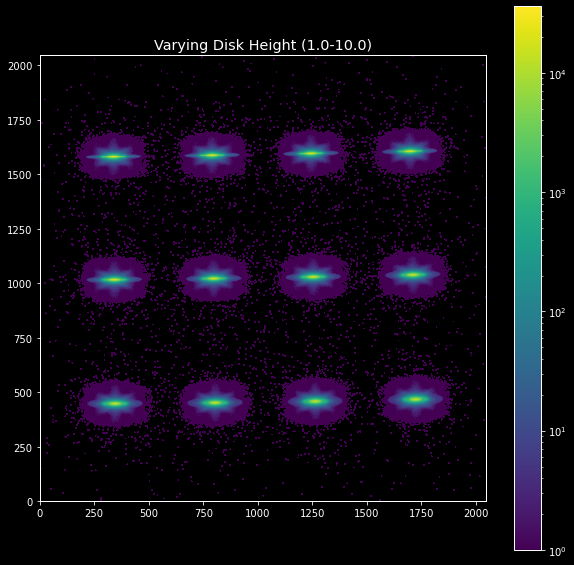

In [138]:
im_name = 'disk_height.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Disk Height (1.0-10.0)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Angle 1 (Degrees)

In [132]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
angle1 = np.linspace(0.0, 180.0, 12)
expT = 600.0

angle1_file = open(output_dir + 'angle1.cat', 'w')

header_params = (angle1_file, 'angle1', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    temp[3] = angle1[i]
    object_params = (angle1_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

angle1_file.close()

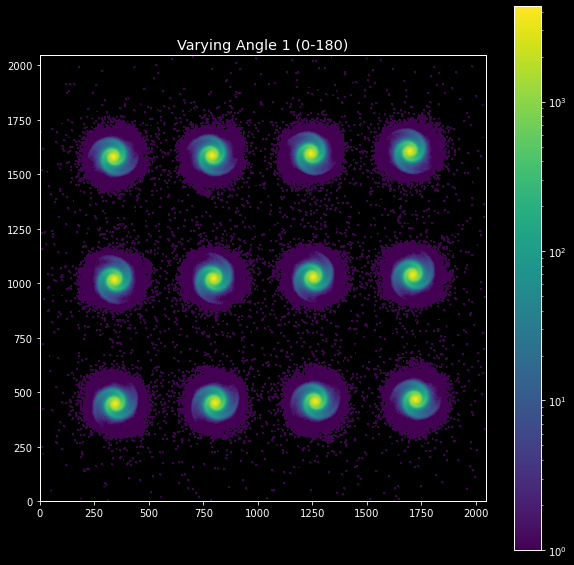

In [133]:
im_name = 'angle1.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Angle 1 (0-180)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Angle 2 (Degrees)

In [134]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
angle2 = np.linspace(0.0, 180.0, 12)
expT = 600.0

angle2_file = open(output_dir + 'angle2.cat', 'w')

header_params = (angle2_file, 'angle2', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    temp[4] = angle2[i]
    object_params = (angle2_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

angle2_file.close()

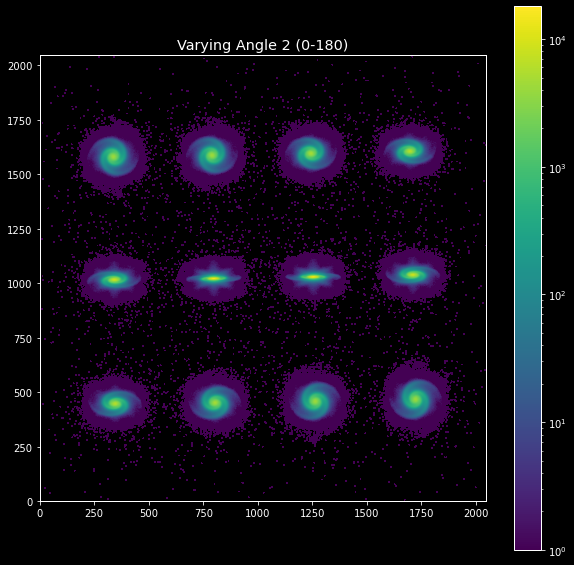

In [136]:
im_name = 'angle2.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Angle 2 (0-180)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Angle 3 (Degrees)

In [139]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
angle3 = np.linspace(0.0, 180.0, 12)
expT = 600.0

angle3_file = open(output_dir + 'angle3.cat', 'w')

header_params = (angle3_file, 'angle3', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    temp[5] = angle3[i]
    object_params = (angle3_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

angle3_file.close()

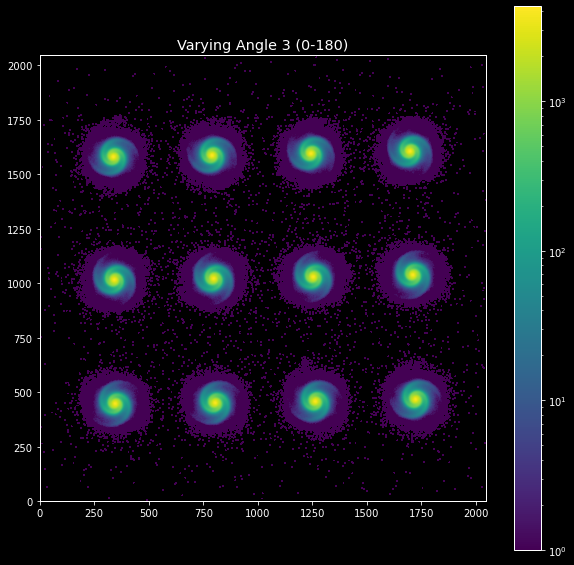

In [150]:
im_name = 'angle3.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Angle 3 (0-180)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Sersic Index

In [141]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
n = np.linspace(1.0, 4.0, 12)
expT = 600.0

sersic_n_file = open(output_dir + 'sersic_n.cat', 'w')

header_params = (sersic_n_file, 'sersic_n', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    temp[6] = n[i]
    object_params = (sersic_n_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

sersic_n_file.close()

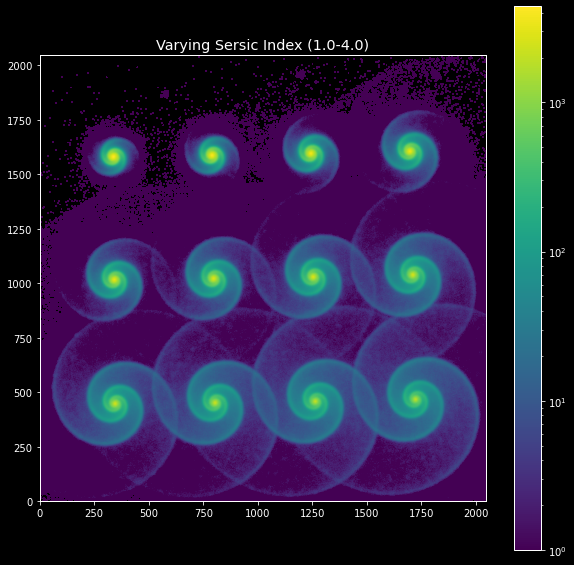

In [142]:
im_name = 'sersic_n.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Sersic Index (1.0-4.0)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Fraction of Light in Clumps

In [143]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
clump_fraction = np.linspace(0.1, 1.0, 12)
expT = 600.0

clump_fraction_file = open(output_dir + 'clump_fraction.cat', 'w')

header_params = (clump_fraction_file, 'clump_fraction', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    temp[7] = clump_fraction[i]
    object_params = (clump_fraction_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

clump_fraction_file.close()

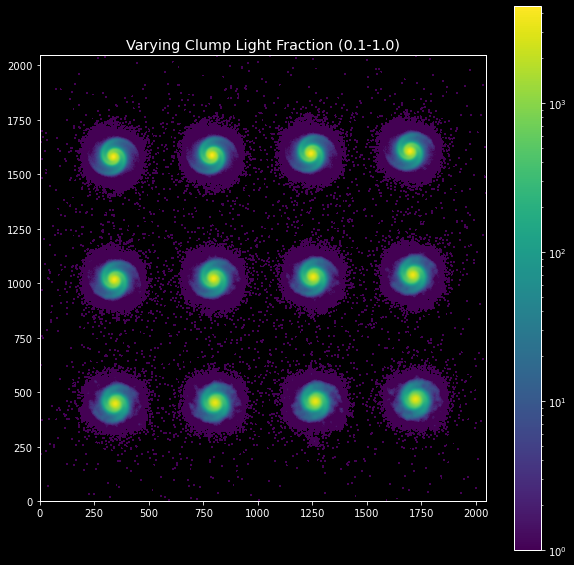

In [145]:
im_name = 'clump_fraction.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Clump Light Fraction (0.1-1.0)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Number of Clumps

In [147]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
clump_number = np.linspace(10, 1e5, 12, dtype = int)
expT = 600.0

clump_number_file = open(output_dir + 'clump_number.cat', 'w')

header_params = (clump_number_file, 'clump_number', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    # Increase fraction of light in clumps so it is noticeable
    temp[7] = 0.8
    temp[8] = clump_number[i]
    object_params = (clump_number_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

clump_number_file.close()

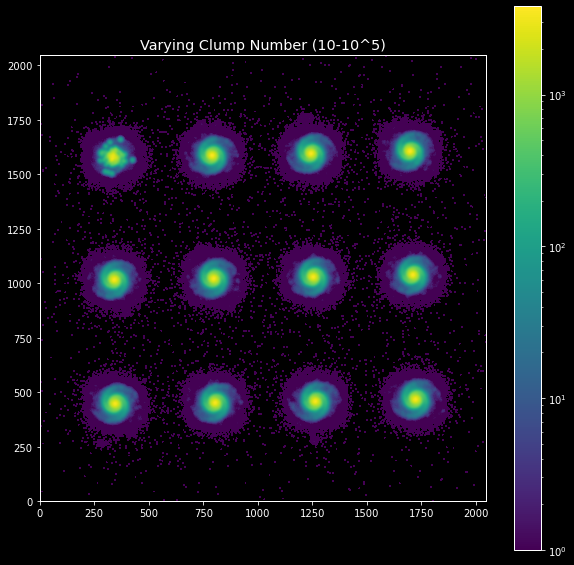

In [151]:
im_name = 'clump_number.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Clump Number (10-10^5)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Gaussian Clump Size (Arcseconds)

In [9]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
clump_size = np.linspace(0.1, 0.5, 12)
expT = 600.0

clump_size_file = open(output_dir + 'clump_size.cat', 'w')

header_params = (clump_size_file, 'clump_size', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    # Increase fraction of light in clumps so it is noticeable, and fewer clumps so noticeable
    temp[7] = 0.8
    temp[8] = 10
    temp[9] = clump_size[i]
    object_params = (clump_size_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

clump_size_file.close()

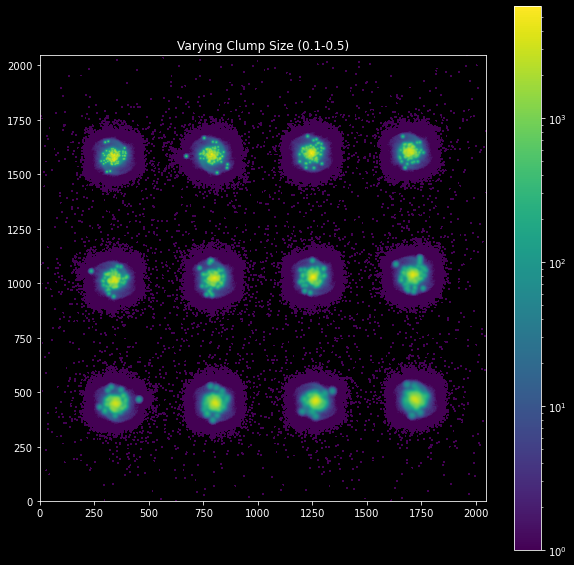

In [10]:
im_name = 'temp.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Clump Size (0.1-0.5)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Fraction of Light in Spiral

In [11]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
spiral_fraction = np.linspace(0.1, 1.0, 12)
expT = 600.0

spiral_fraction_file = open(output_dir + 'spiral_fraction.cat', 'w')

header_params = (spiral_fraction_file, 'spiral_fraction', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    # Increase fraction of light in clumps so it is noticeable, and fewer clumps so noticeable
    temp[10] = spiral_fraction[i]
    object_params = (spiral_fraction_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

spiral_fraction_file.close()

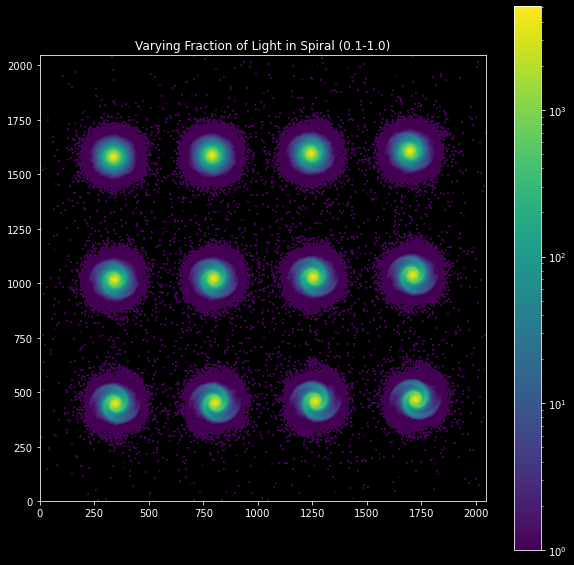

In [13]:
im_name = 'spiral_fraction.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Fraction of Light in Spiral (0.1-1.0)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Winding Angle of Spiral (Degrees)

In [15]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
winding_angle = np.linspace(5.0, 30.0, 12)
expT = 600.0

winding_angle_file = open(output_dir + 'winding_angle.cat', 'w')

header_params = (winding_angle_file, 'winding_angle', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    # Increase fraction of light in clumps so it is noticeable, and fewer clumps so noticeable
    temp[11] = winding_angle[i]
    object_params = (winding_angle_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

winding_angle_file.close()

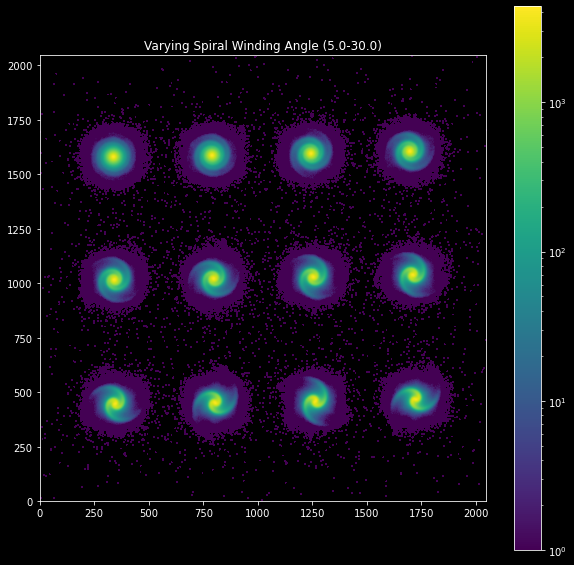

In [16]:
im_name = 'winding_angle.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Spiral Winding Angle (5.0-30.0)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Spiral Bar Size (arcseconds)

In [17]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
bar_size = np.linspace(0., 0.5, 12)
expT = 600.0

bar_size_file = open(output_dir + 'bar_size.cat', 'w')

header_params = (bar_size_file, 'bar_size', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    # Increase fraction of light in clumps so it is noticeable, and fewer clumps so noticeable
    temp[12] = bar_size[i]
    object_params = (bar_size_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

bar_size_file.close()

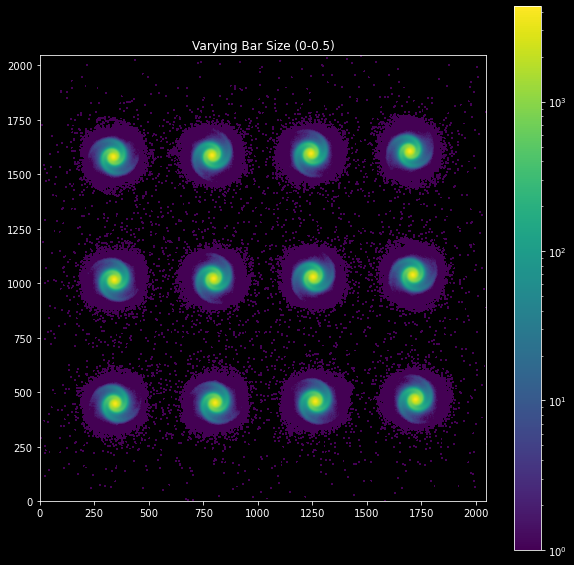

In [18]:
im_name = 'bar_size.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Varying Bar Size (0-0.5)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Spiral Gaussian Width (arcseconds)

In [21]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
spiral_width = np.linspace(0.1, 0.6, 12)
expT = 600.0

spiral_width_file = open(output_dir + 'spiral_width.cat', 'w')

header_params = (spiral_width_file, 'spiral_width', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    # Increase fraction of light in clumps so it is noticeable, and fewer clumps so noticeable
    temp[13] = spiral_width[i]
    object_params = (spiral_width_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

spiral_width_file.close()

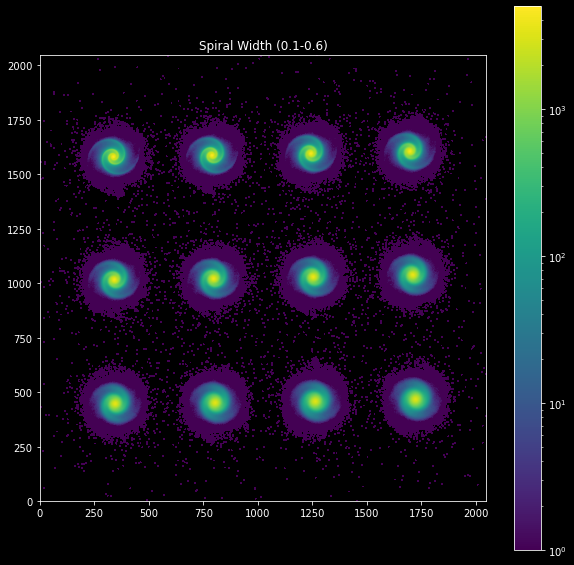

In [22]:
im_name = 'spiral_width.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Spiral Width (0.1-0.6)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()

# Position Angle of Spiral (Degrees)

In [28]:
RAs = np.tile(np.arange(-0.012, 0.016, 0.008), 3)
DECs = np.sort((np.tile(np.arange(-0.01, 0.02, 0.01), 4)))[::-1]
position_angle = np.linspace(0., 180., 12)
expT = 600.0

position_angle_file = open(output_dir + 'position_angle.cat', 'w')

header_params = (position_angle_file, 'position_angle', 'F277W', 0.0, 0.0, expT)
write_header(*header_params)

for i in range(len(RAs)):
    temp = default_vals.copy()
    # Increase fraction of light in clumps so it is noticeable, and fewer clumps so noticeable
    temp[14] = position_angle[i]
    object_params = (position_angle_file, RAs[i], DECs[i], m, sed) + tuple(temp)
    write_object(*object_params)

position_angle_file.close()

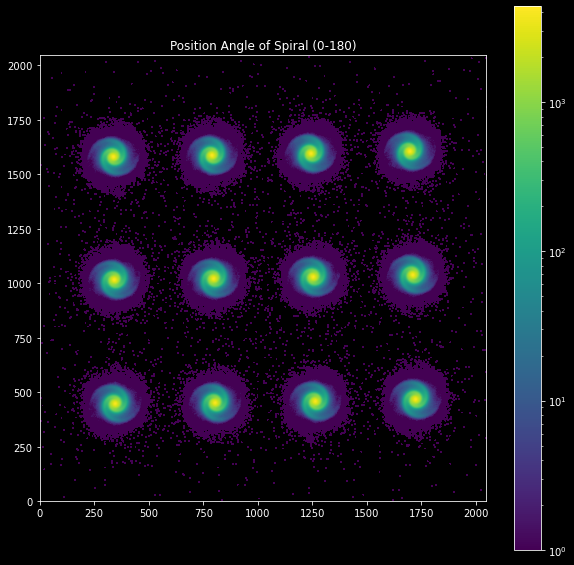

In [29]:
im_name = 'position_angle.fits.gz'
im_data = fits.open(im_dir + im_name)[0].data

fig = plt.figure(figsize = (10,10))
ax = fig.add_subplot(111)
ax.set_aspect(1.0)
plt.title('Position Angle of Spiral (0-180)')
plt.imshow(im_data, origin = 'lower', norm = LogNorm())
plt.colorbar()